<a href="https://colab.research.google.com/github/mariafadilla15/MachineLearning_Ganjil_2023/blob/main/week3_mariaf_mcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**MACHINE LEARNING** - Jobsheet 3: Regresi</u>

**MARIA FADILLA** | TI-3D | 15 | 2141720063

Selasa, 12 September 2023

#**PRAKTIKUM 1**

## **Langkah 1: Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

##**Langkah 2: Import Library**

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

In [ ]:
# import package
import numpy as np
import pandas as pd

##**Langkah 3: Baca Data**

Baca data dari file CSV dengan menggunakan Pandas.

In [ ]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

##**Langkah 4: Pemahaman Terhadap Data**

Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


##**Langkah 5: Visualisasi Data**

Import library Matplotlib dan Seaborn untuk visualisasi data.

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


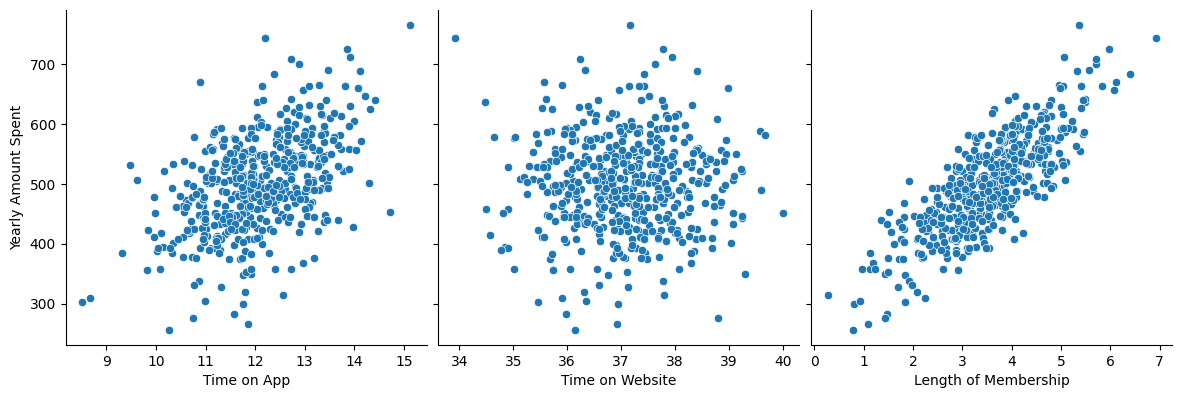

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin terang warna, semakin tinggi korelasinya.

<ipython-input-8-9f46fa45ac4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


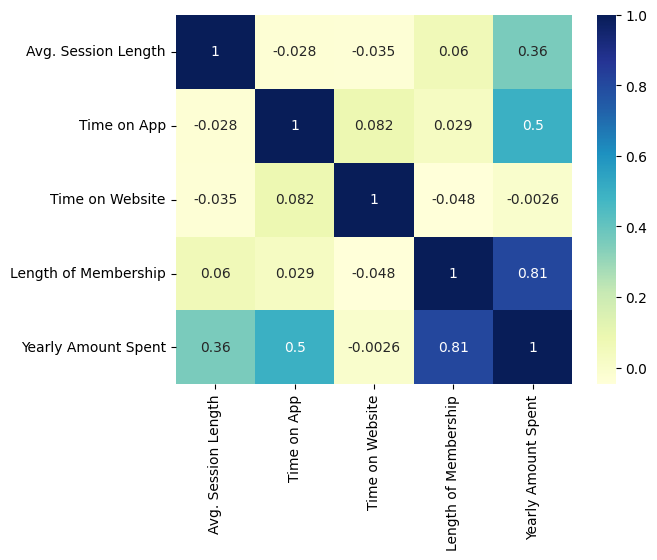

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

##**Langkah 6: Regresi Linier**

Pisahkan variabel bebas (X) dan variabel target (y).

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualisasikan garis regresi pada data latih.

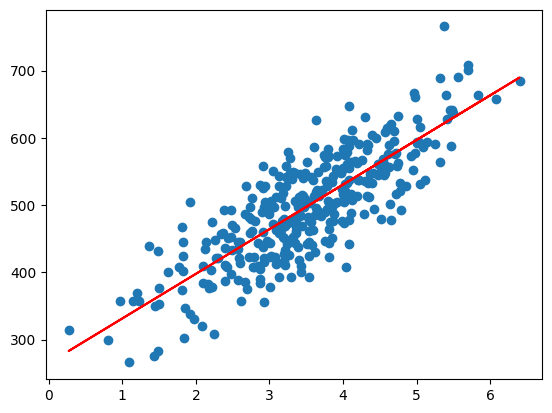

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

##**Langkah 7: Analisis Residual**

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

<ipython-input-15-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


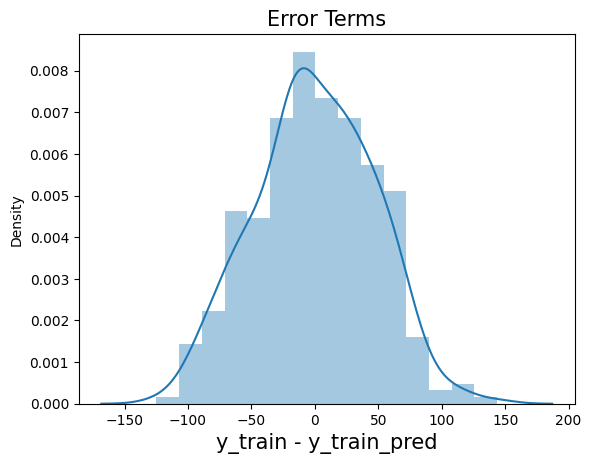

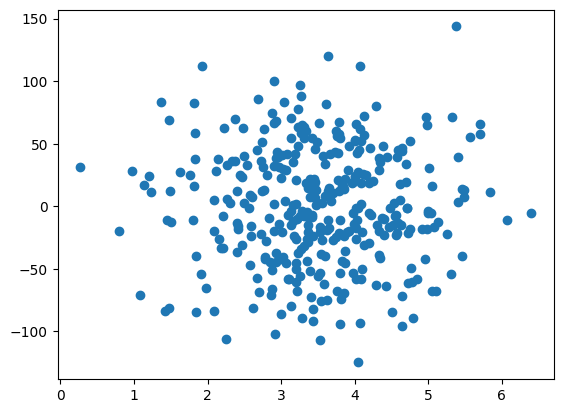

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

##**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model**

Lakukan prediksi pada data uji.

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

##**Langkah 9: Visualisasi Hasil**

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

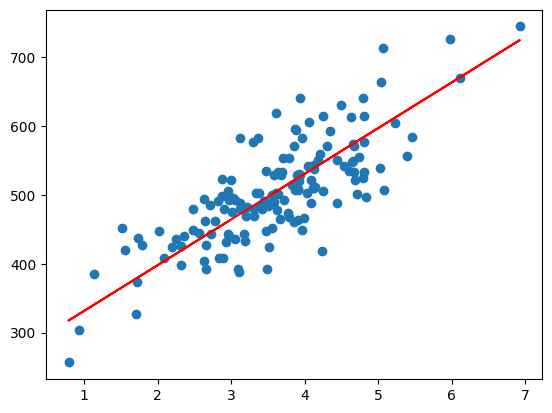

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Dengan langkah-langkah di atas, dapat dilakukan analisis regresi linier pada data, mengukur kinerja model, dan memvisualisasikan hasilnya.

#**PRAKTIKUM 2**

##**Langkah 1: Mengimpor Library**

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##**Langkah 2: Mengimpor Dataset**

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

##**Langkah 3: Feature Scaling**

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

##**Langkah 4: Fitting SVR ke Dataset**

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##**Langkah 5: Visualisasi Hasil SVR**

angkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

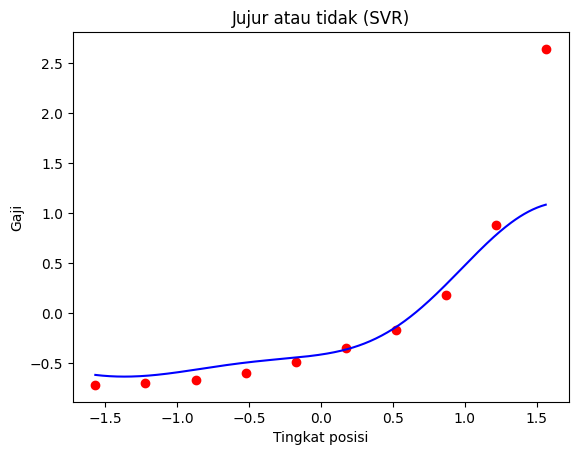

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

##**Langkah 6: Prediksi Hasil**

* Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
Menskalakan fitur prediksi menggunakan sc_X.transform.
* Melakukan prediksi menggunakan model SVR yang telah dilatih.
* Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

##**Langkah 7: Menampilkan Hasil**

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [0.01150915]


##**Langkah 8: Validasi Hasil**

##**Langkah 9: Evaluasi Model SVR**

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared


















































































In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = y #sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print('y_actual', y_actual)
print('\ny_pred', y_pred)

print("\nMAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

y_actual [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]

y_pred [-0.61985717 -0.629033   -0.56735658 -0.49662252 -0.44630564 -0.36590427
 -0.14129748  0.28510258  0.78163737  1.08500645]

MAE: 0.22322362280774546
MSE: 0.24861632111450263
RMSE: 0.49861440123055273
R-squared: 0.7513836788854974


#**TUGAS PRAKTIKUM**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum**:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

### **Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
# baca data dari file CSV
data = pd.read_csv('insurance.csv')

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


variabel bebas (fitur) yang terdiri dari age, sex, bmi, children, smoker, dan region untuk memprediksi variabel target (biaya medis personal), yaitu charges.

In [ ]:
# Identifikasi variabel bebas (fitur)
fitur = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Identifikasi variabel target (biaya medis personal)
target = data['charges']

# Cek hasil identifikasi
print("Variabel Bebas (Fitur):")
print(fitur.head())  # Menampilkan 5 baris pertama dari variabel bebas

print("\nVariabel Target (Biaya Medis Personal):")
print(target.head())  # Menampilkan 5 baris pertama dari variabel target

Variabel Bebas (Fitur):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Variabel Target (Biaya Medis Personal):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.3, random_state=42)

# Test_size adalah proporsi data uji, dalam contoh ini 30% dari data digunakan untuk uji
# Random_state adalah nilai seed yang digunakan untuk pengacakan, agar hasil dapat direproduksi

# Cek ukuran data latih dan data uji
print("Ukuran Data Latih (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran Data Uji (X_test, y_test):", X_test.shape, y_test.shape)


Ukuran Data Latih (X_train, y_train): (936, 6) (936,)
Ukuran Data Uji (X_test, y_test): (402, 6) (402,)


3. Lakukan feature scaling jika diperlukan.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Melakukan feature scaling pada fitur-fitur numerik tertentu
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

numerical_features = ['age', 'bmi', 'children']

# Fit dan transformasi pada data latih
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transformasi pada data uji (gunakan mean dan std dev dari data latih)
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Mengidentifikasi kolom-kolom yang perlu diubah
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Membuat transformers untuk scaling variabel numerik dan one-hot encoding variabel kategorikal
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Menggabungkan transformers untuk semua fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Membuat model Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Evaluasi model pada data uji
score = model.score(X_test, y_test)
print("Koefisien Determinasi (R^2) pada Data Uji:", score)


Koefisien Determinasi (R^2) pada Data Uji: 0.769611805436901


5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Cek hasil prediksi
print("Hasil Prediksi pada Data Uji:")
print(y_pred)


Hasil Prediksi pada Data Uji:
[ 9.01636753e+03  7.01997635e+03  3.68708343e+04  9.51853774e+03
  2.69740308e+04  1.10808462e+04 -4.06177600e+01  1.71922331e+04
  9.74950536e+02  1.13299594e+04  2.80574861e+04  9.47838799e+03
  4.98095281e+03  3.84564701e+04  4.03433327e+04  3.71038753e+04
  1.51982019e+04  3.57689693e+04  8.88568387e+03  3.13835989e+04
  3.79641903e+03  1.02628964e+04  2.37593679e+03  7.26280819e+03
  1.12875675e+04  1.31383480e+04  1.46241614e+04  6.07324604e+03
  1.00361537e+04  1.97927814e+03  9.07103928e+03  1.31369887e+04
  4.30868680e+03  3.21105955e+03  4.48957162e+03  1.33774493e+04
  1.82221028e+03  8.79191682e+03  3.31981518e+04  3.25005781e+04
  3.76368816e+03  4.35479656e+03  1.42473276e+04  1.15436019e+04
  8.70433805e+03  1.22401028e+04  5.20831471e+03  2.98293172e+03
  3.54465532e+04  9.10285846e+03  1.57820945e+04  2.13473894e+03
  1.24668220e+04  1.54938571e+03  1.34053719e+04  1.28473334e+04
  4.45292570e+03  3.22437514e+04  1.34037537e+04  1.30759280

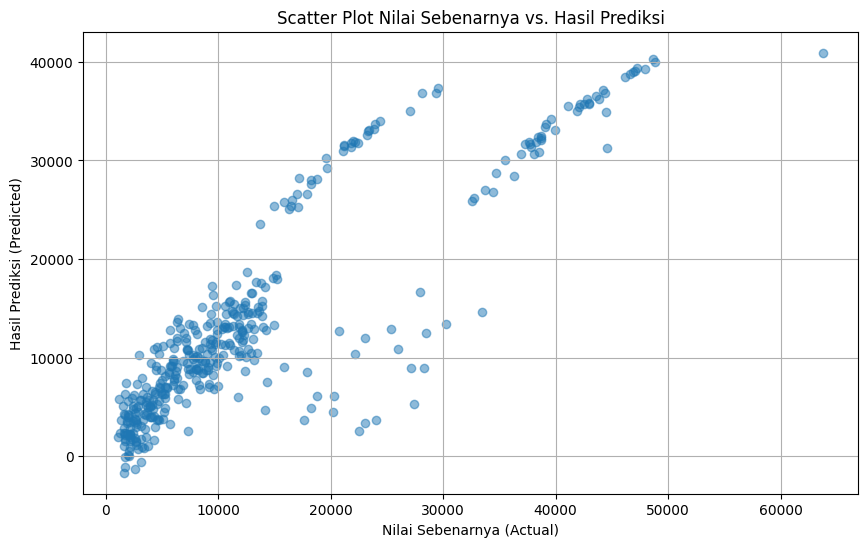

In [ ]:
import matplotlib.pyplot as plt

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat scatter plot hasil prediksi vs. nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Nilai Sebenarnya (Actual)')
plt.ylabel('Hasil Prediksi (Predicted)')
plt.title('Scatter Plot Nilai Sebenarnya vs. Hasil Prediksi')
plt.grid(True)
plt.show()


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.